In [2]:
from uatu.watchers import *
from sklearn.model_selection import train_test_split
import h5py
import numpy as np
from itertools import izip

/home/sean/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [4]:
from matplotlib.colors import LogNorm

In [5]:
from matplotlib import cm

In [6]:
%%bash
ls *saliency*

bayes_org_saliency.npy
bayes_org_shallow2_saliency.npy
saliency.npy


In [7]:
sal = np.load('bayes_org_shallow2_saliency.npy')

In [8]:
sal.shape

(10, 64, 64, 64, 64)

In [9]:
f = h5py.File('../data/UatuTest4_data.hdf5', 'r')

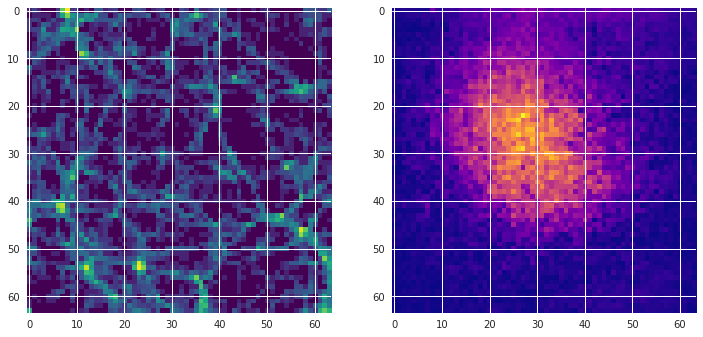

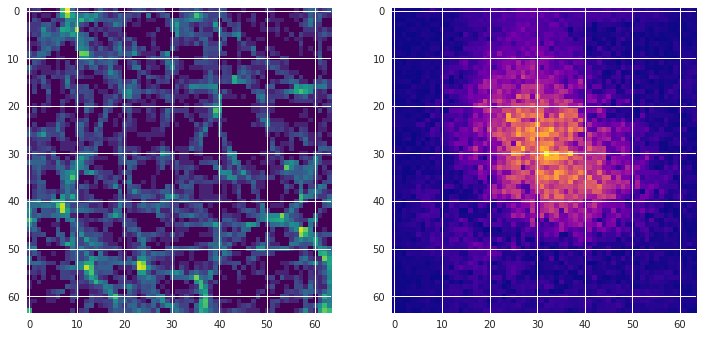

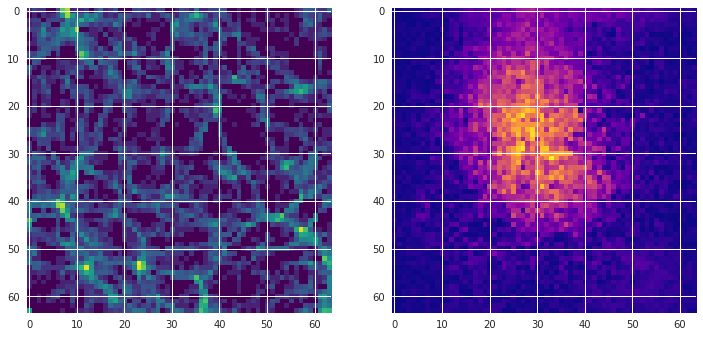

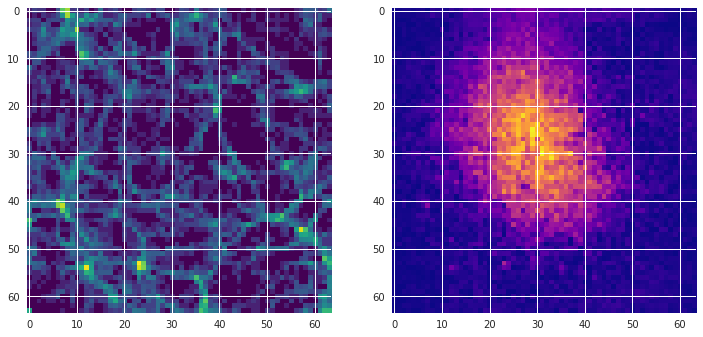

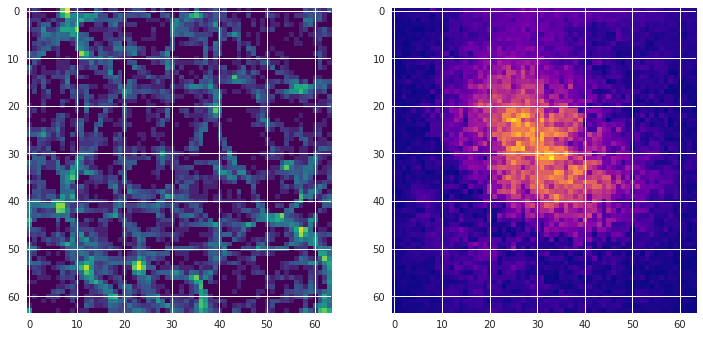

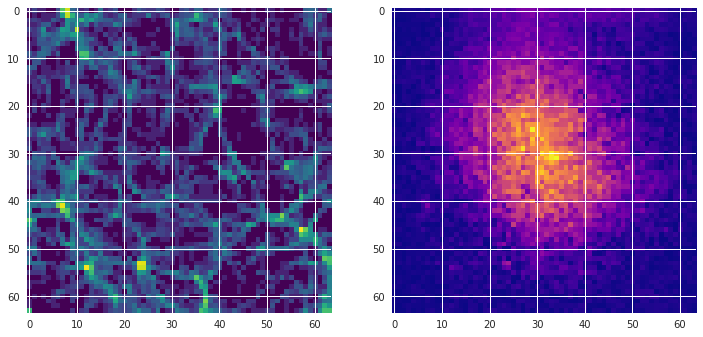

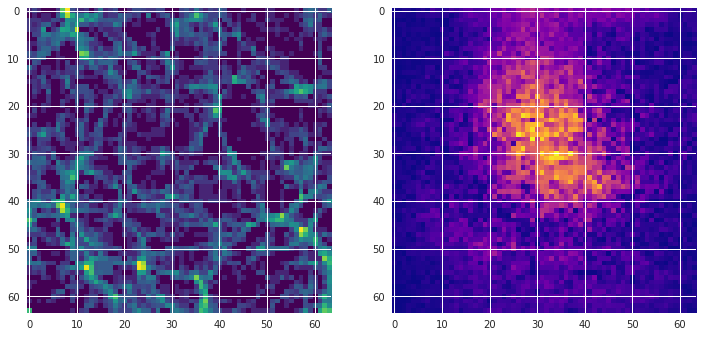

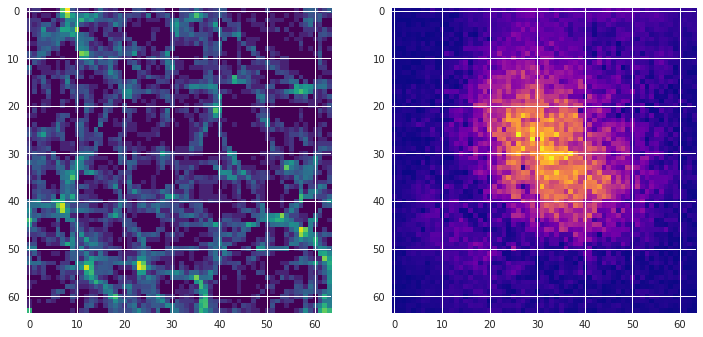

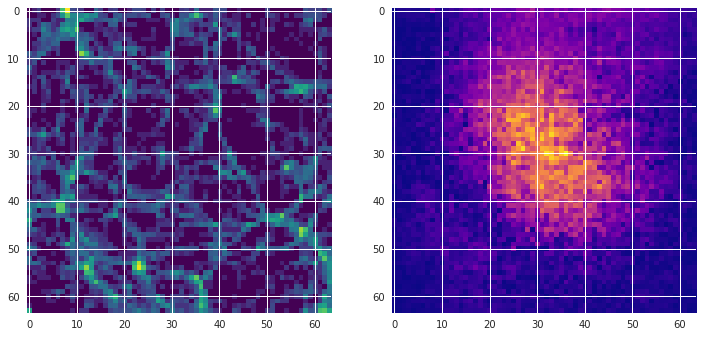

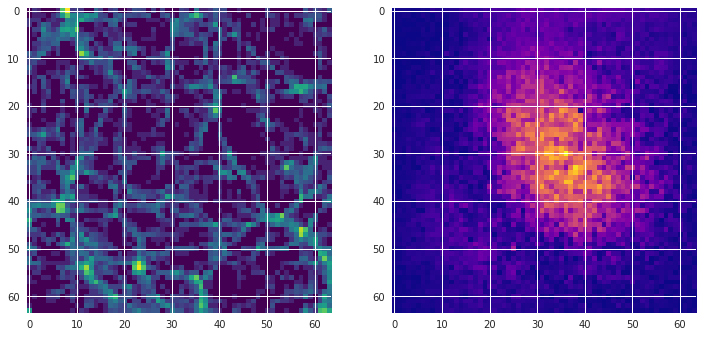

In [26]:
for boxno, s in enumerate(sal):
    X = np.array(f['Box%03d'%boxno]["X"])[:,:,:,:,0].astype(float)
    X[X==0] = 1+1e-6
    #X = np.log10(X)
    idx = 42
    for batch, x in izip(s, X):
        fig = plt.figure(figsize = (12, 6))
        plt.subplot(121)
        plt.imshow(x[:, idx, :], cmap = 'viridis', norm = LogNorm())

        plt.subplot(122)
        #plt.imshow(batch[idx, :, :])#, norm = LogNorm())
        plt.imshow(batch[:, idx, :], cmap = cm.plasma)

        plt.show()
        break


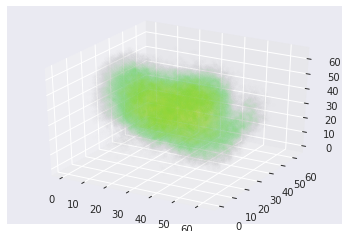

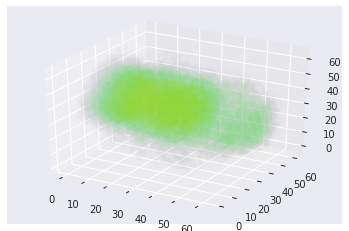

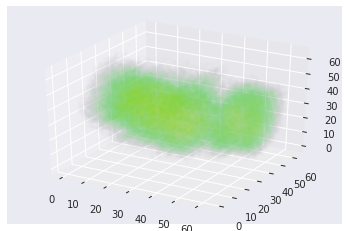

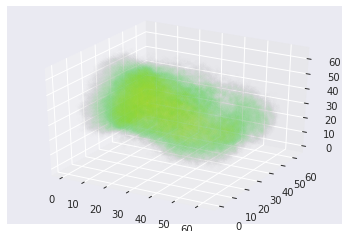

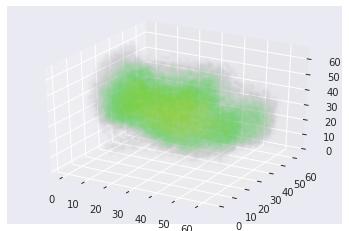

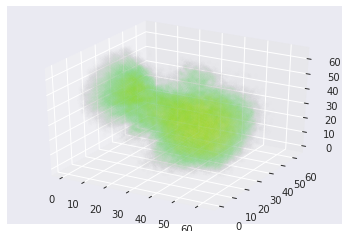

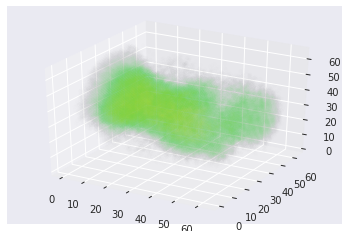

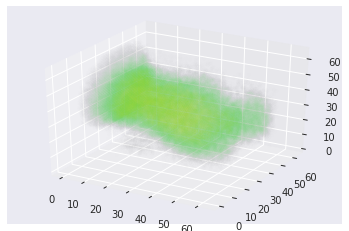

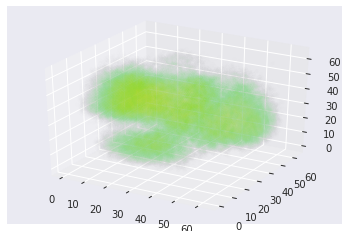

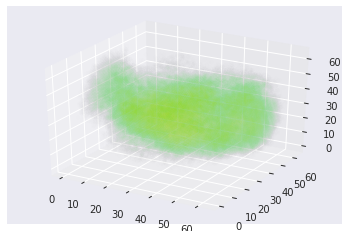

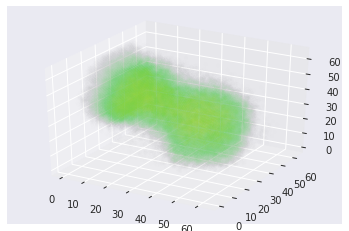

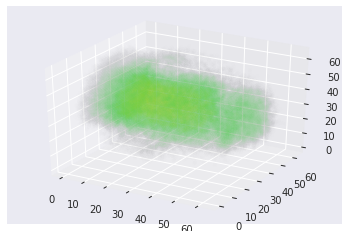

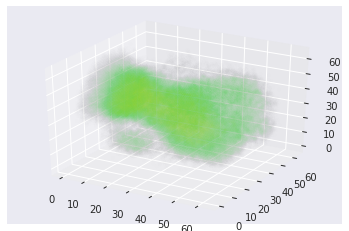

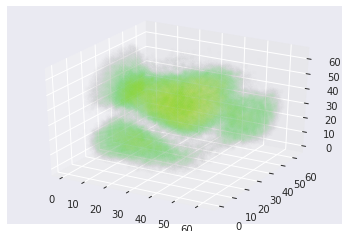

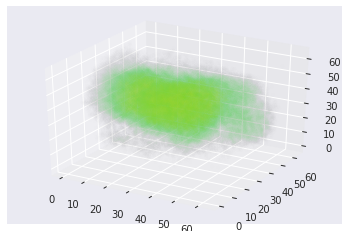

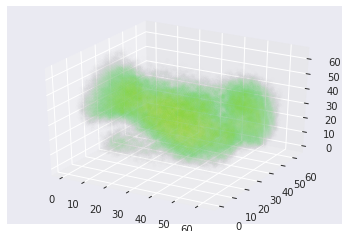

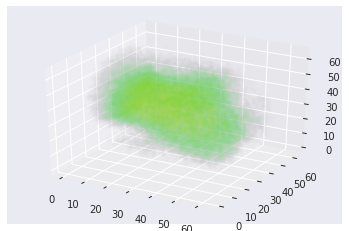

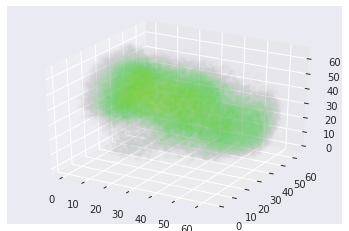

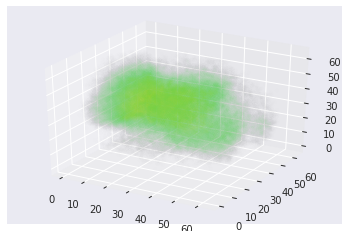

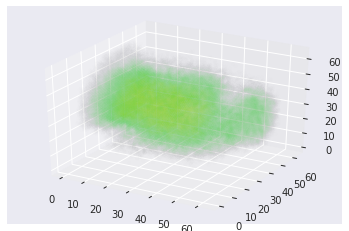

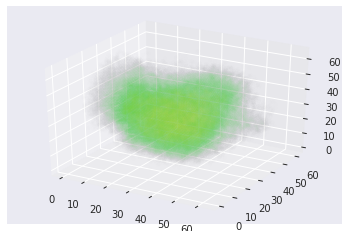

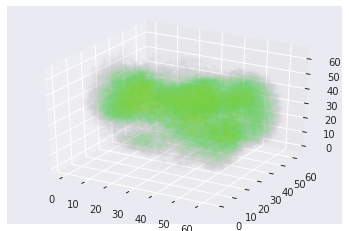

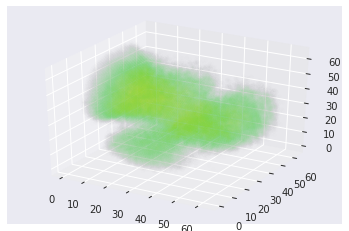

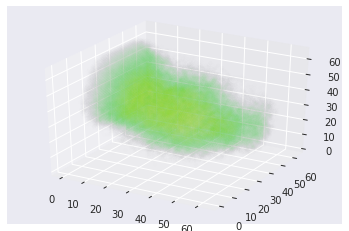

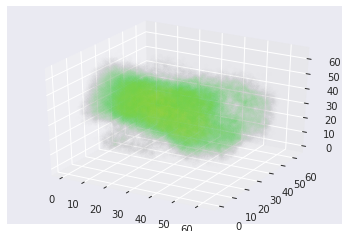

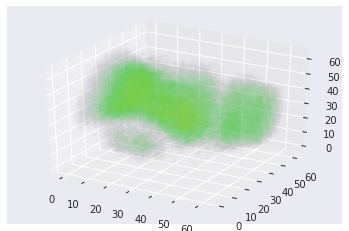

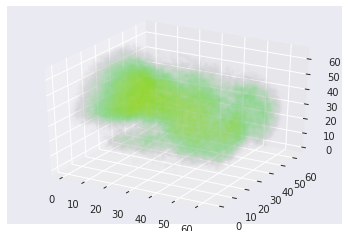

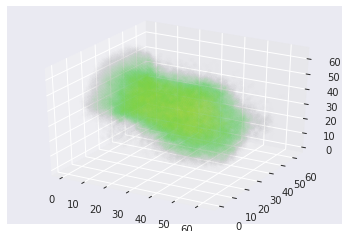

KeyboardInterrupt: 

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib

for plt_s in sal[0]:
    plt_s = plt_s*1e7

    minima = np.min(plt_s)+1e-14
    maxima = np.max(plt_s)
    
    plt_s[plt_s.mean()> plt_s] = 0
    

    norm = matplotlib.colors.LogNorm(vmin=minima, vmax=maxima, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('viridis'))


    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    xs, ys, zs = np.nonzero(plt_s)
    ax.scatter(xs, ys, zs, c=mapper.to_rgba(plt_s[xs, ys, zs]), alpha = 0.005, norm = norm)


    plt.show()


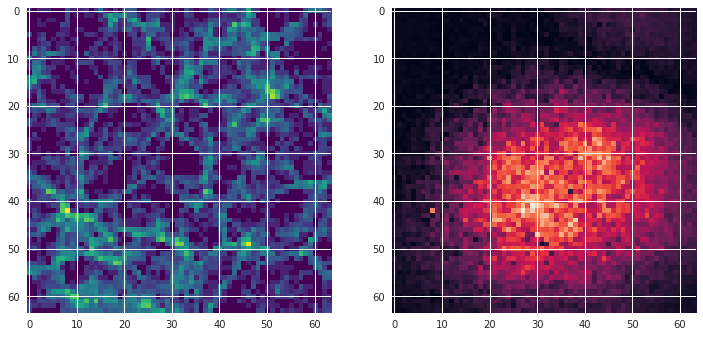

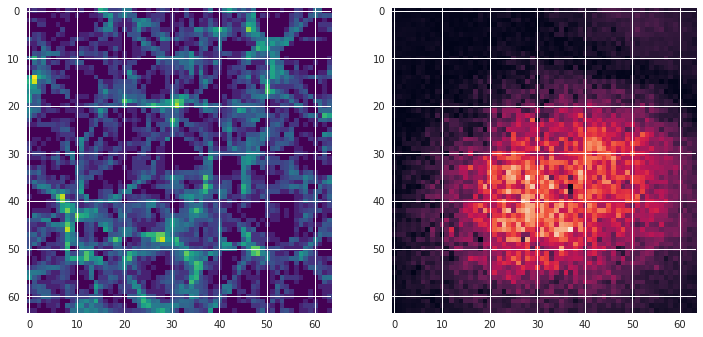

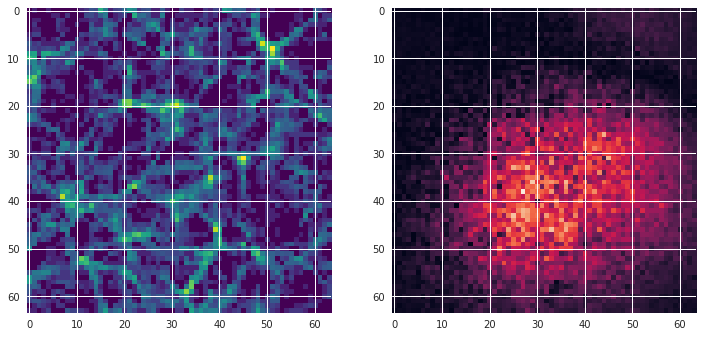

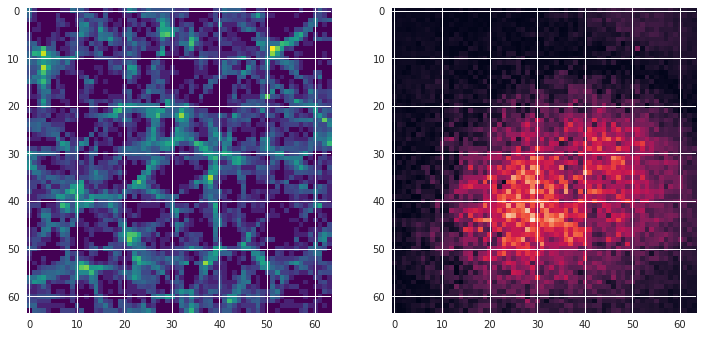

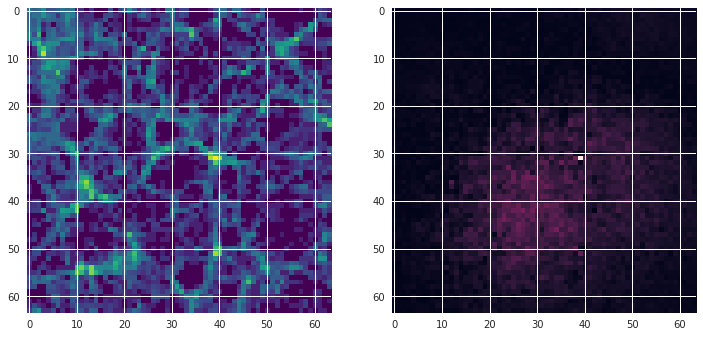

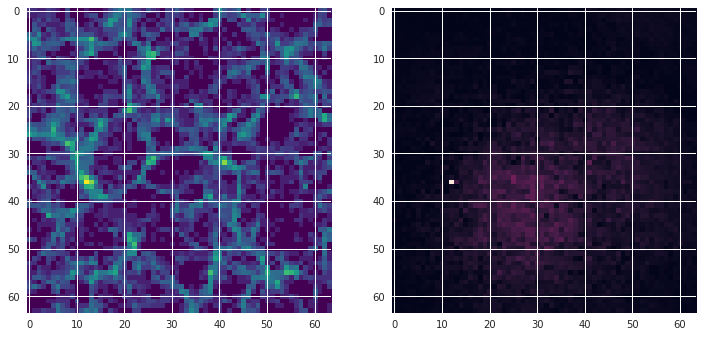

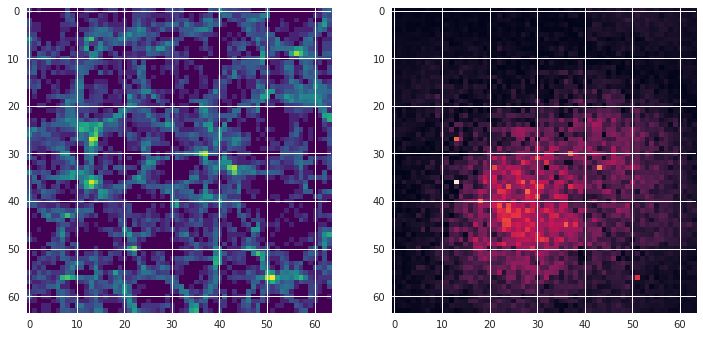

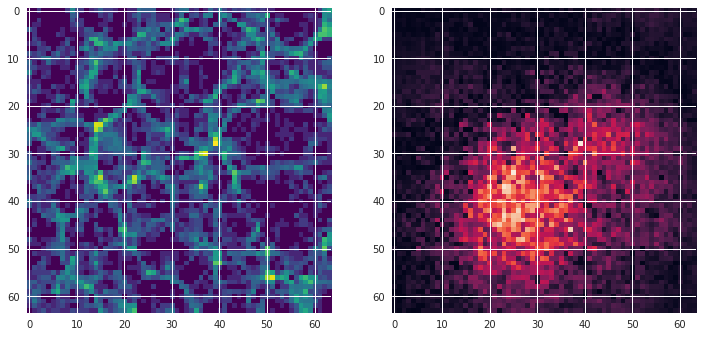

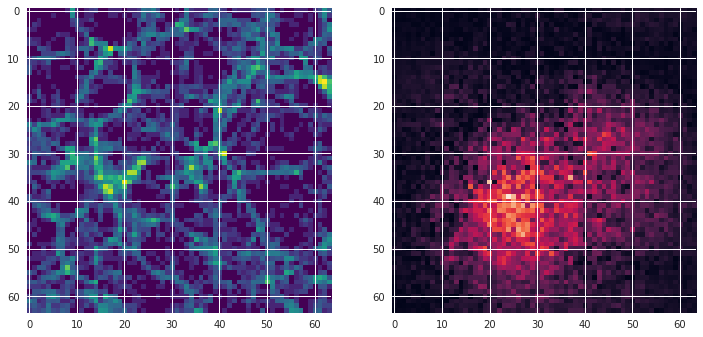

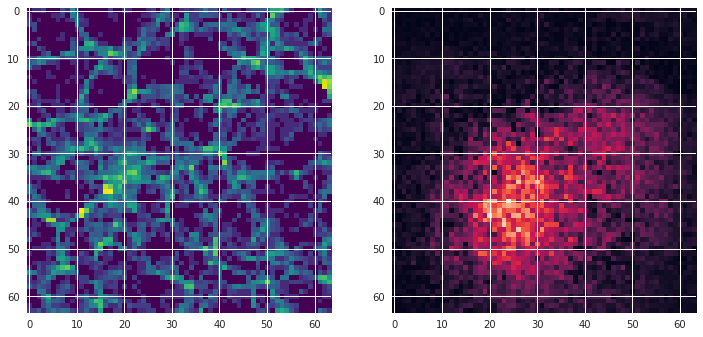

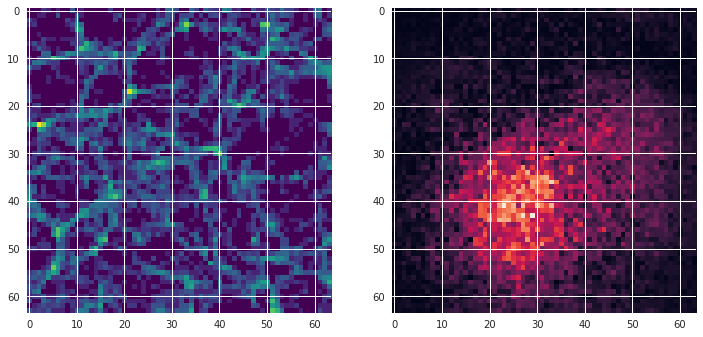

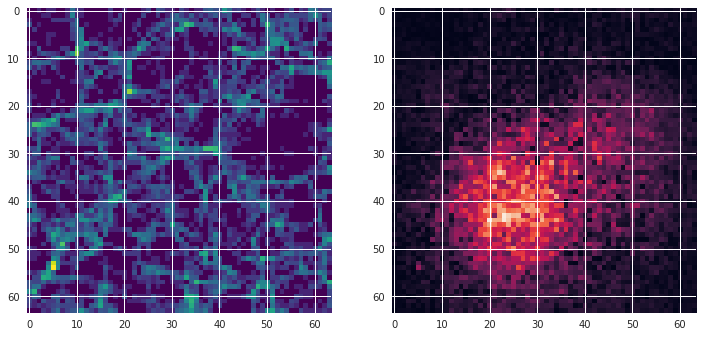

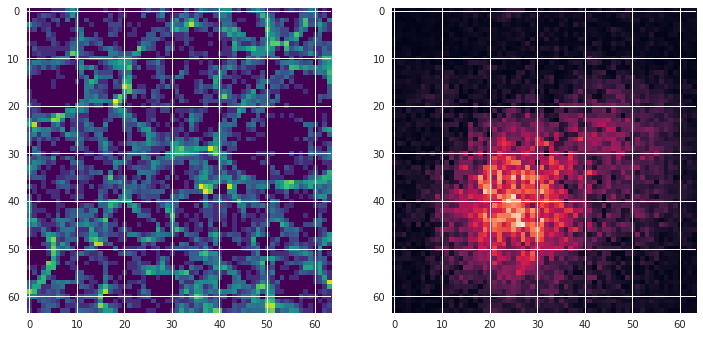

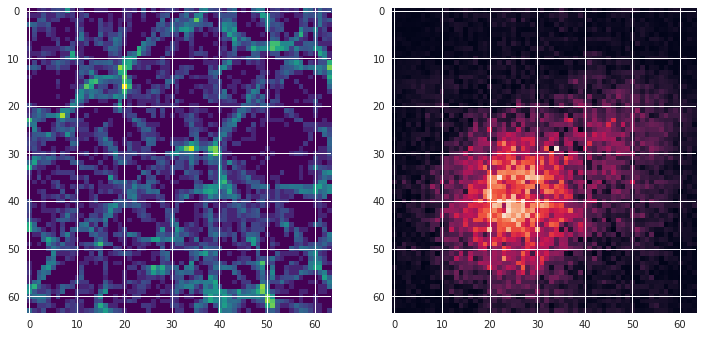

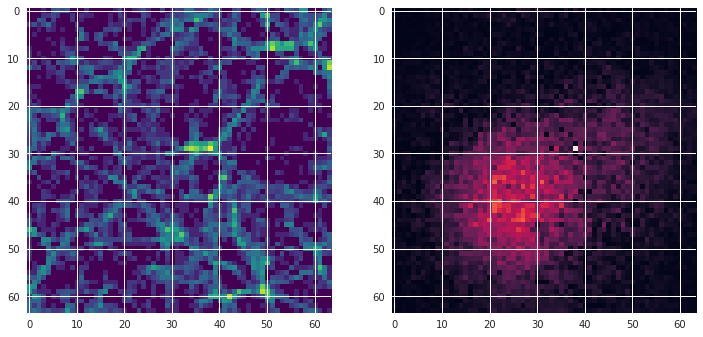

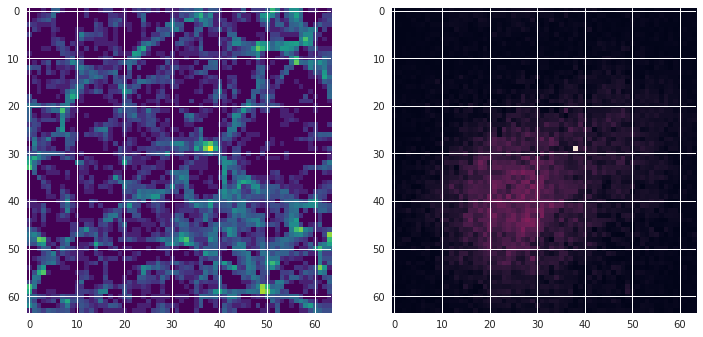

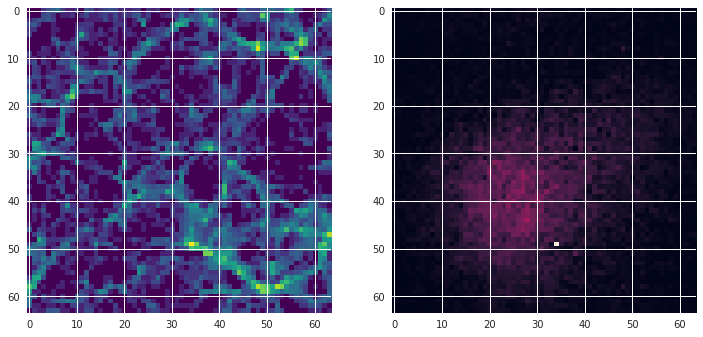

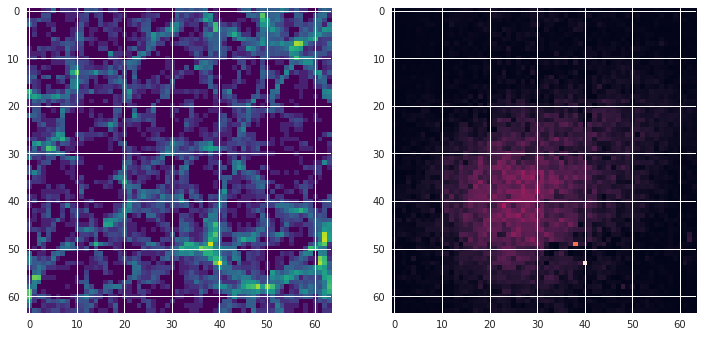

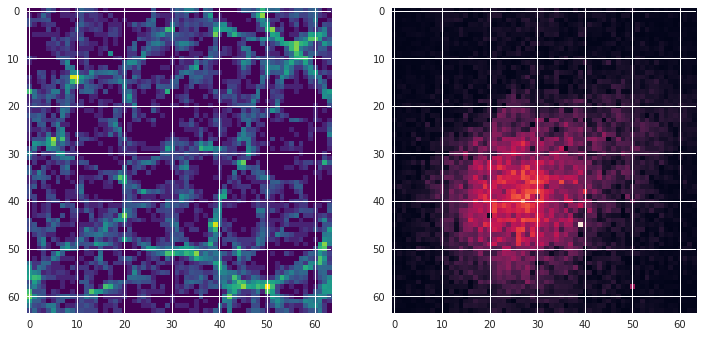

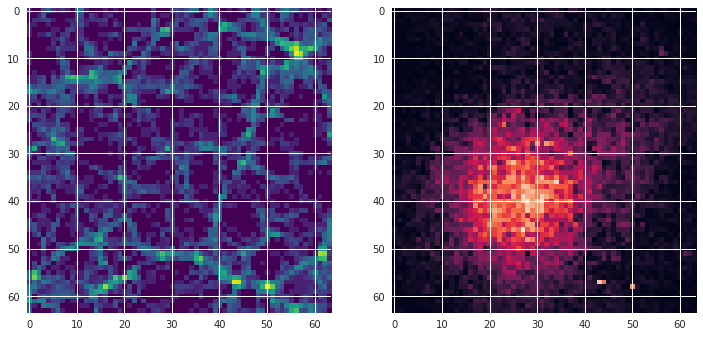

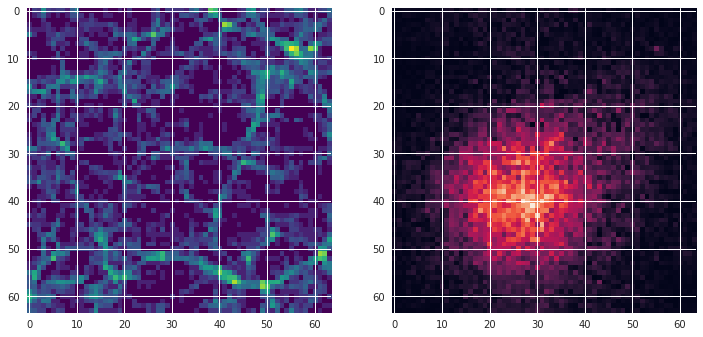

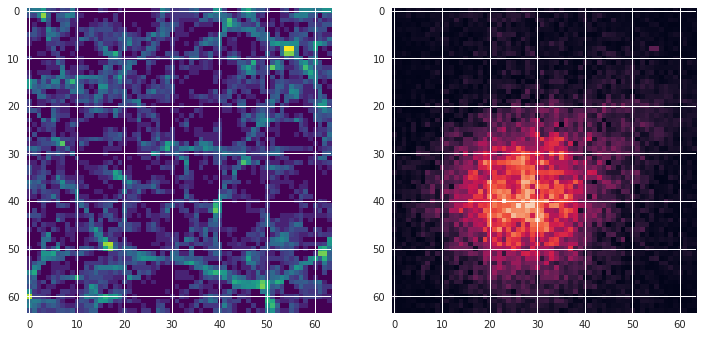

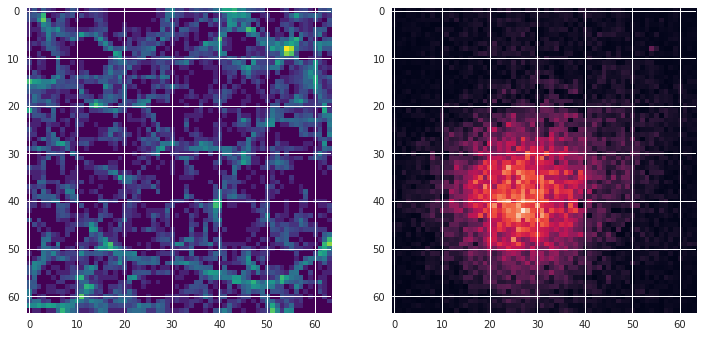

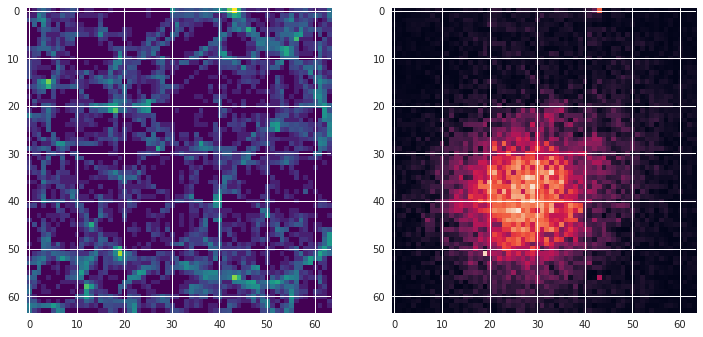

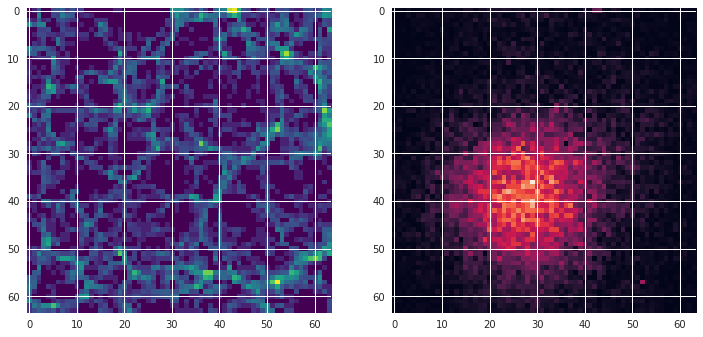

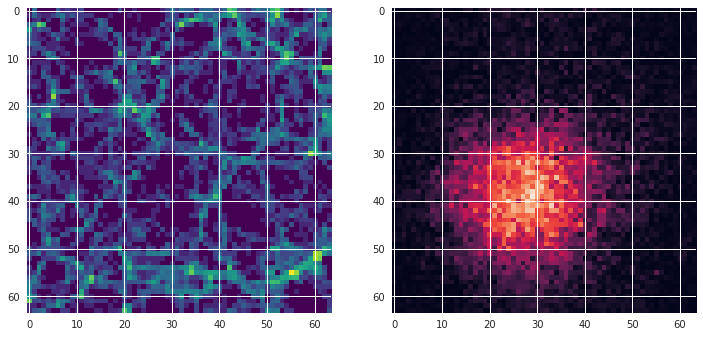

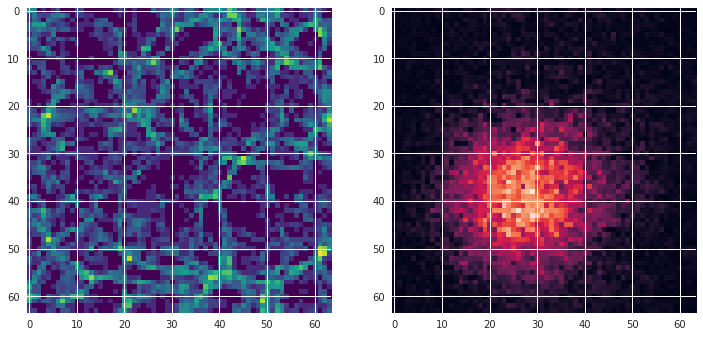

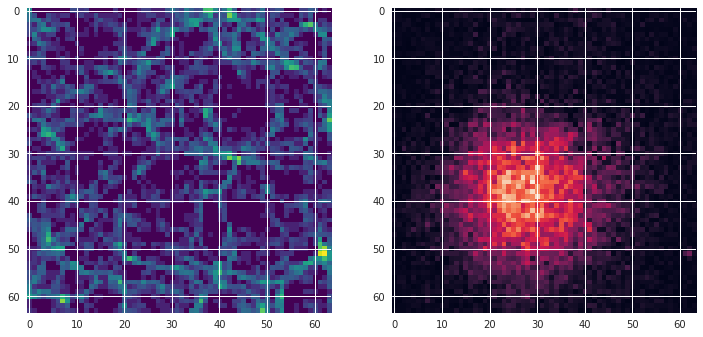

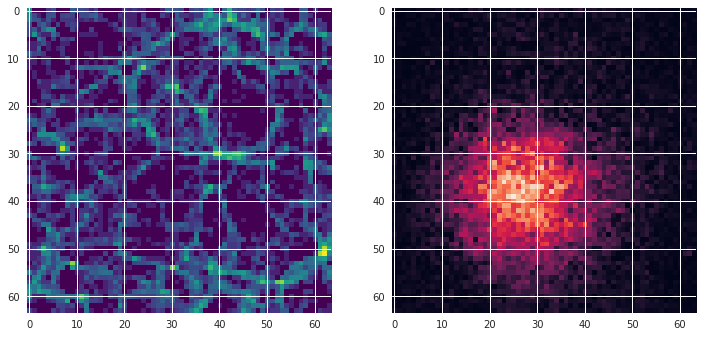

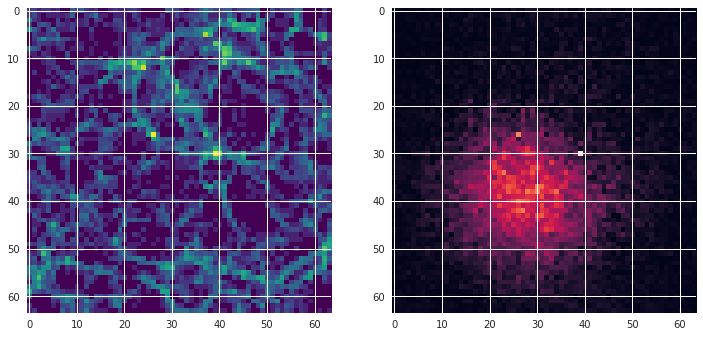

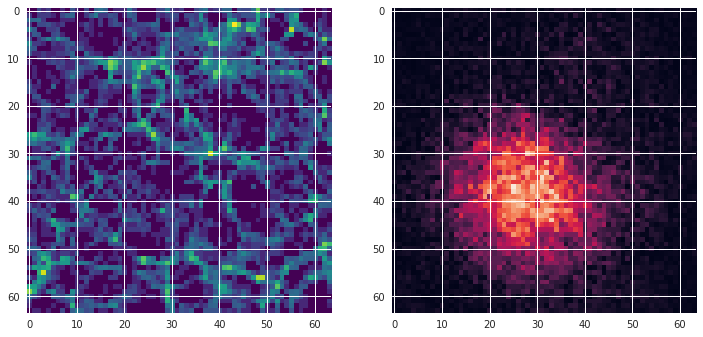

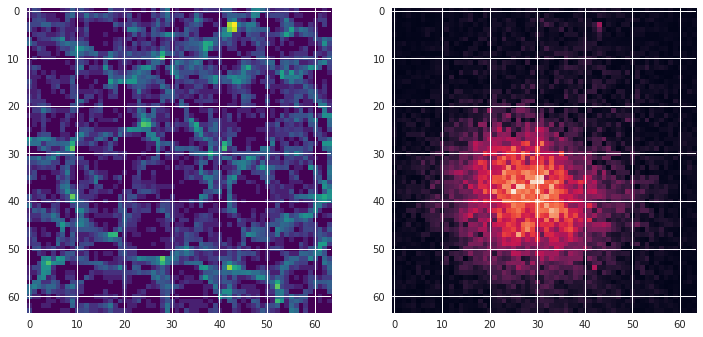

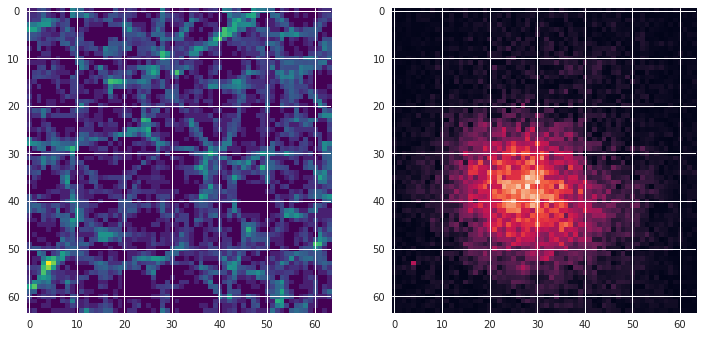

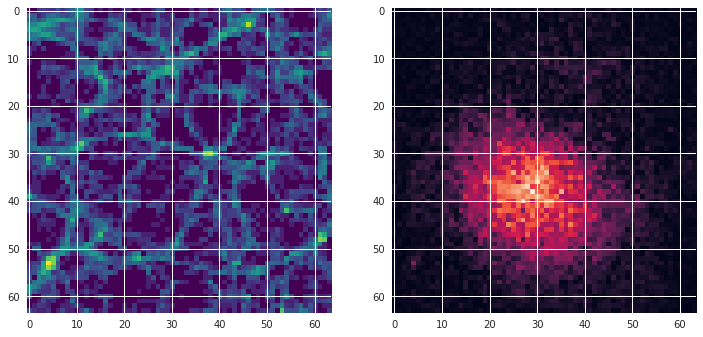

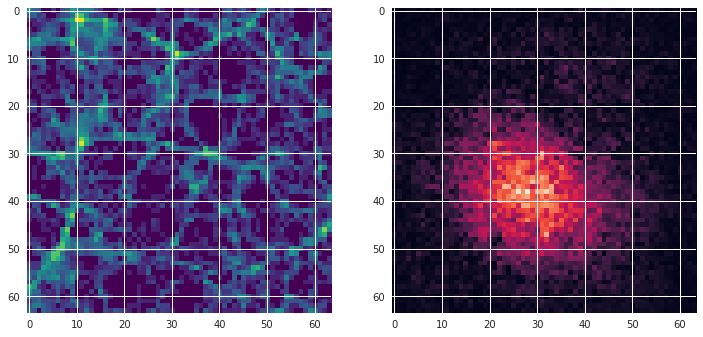

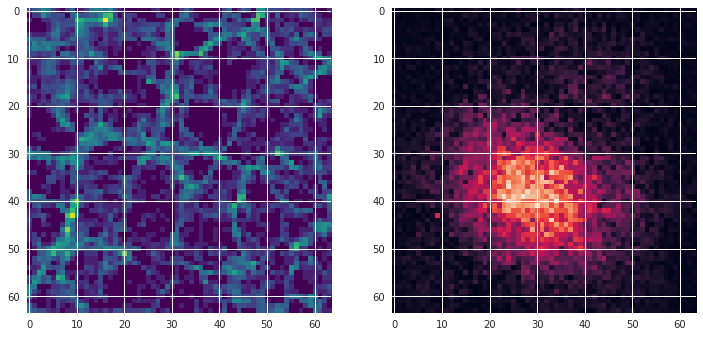

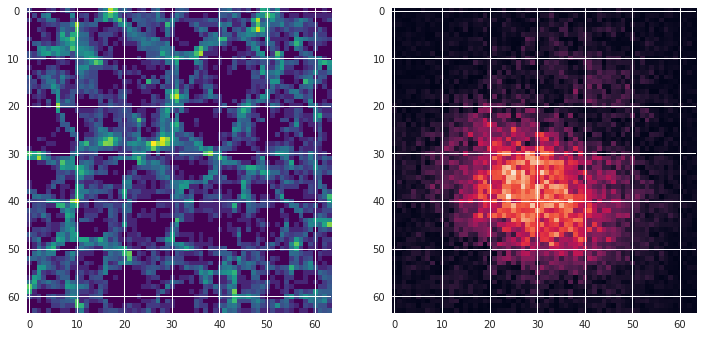

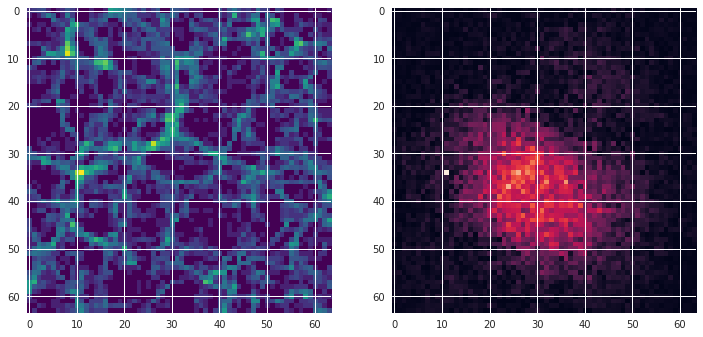

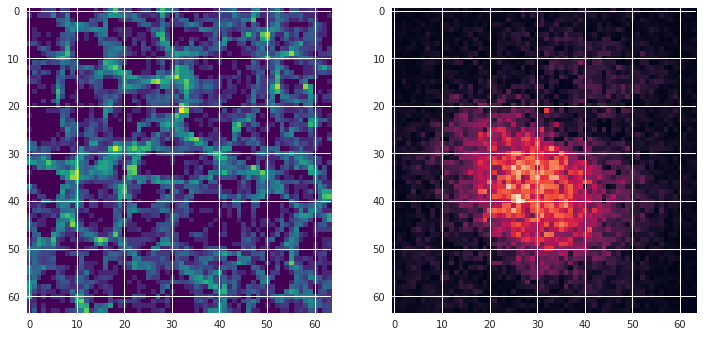

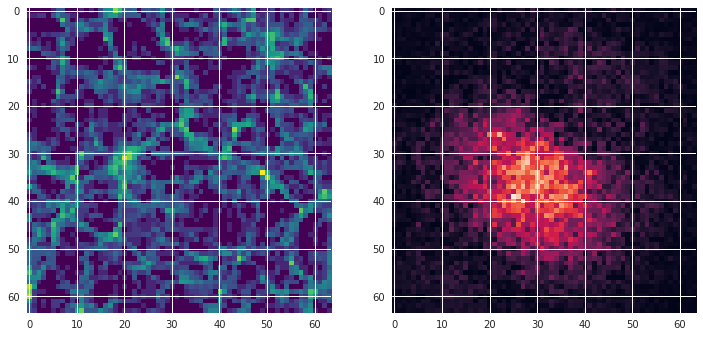

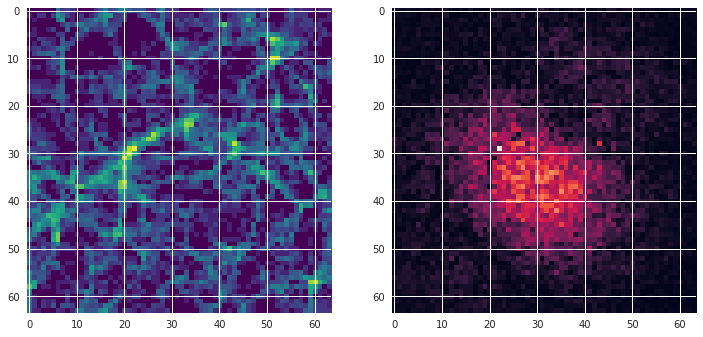

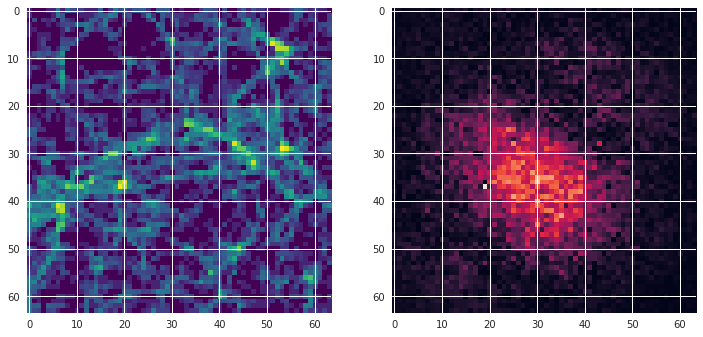

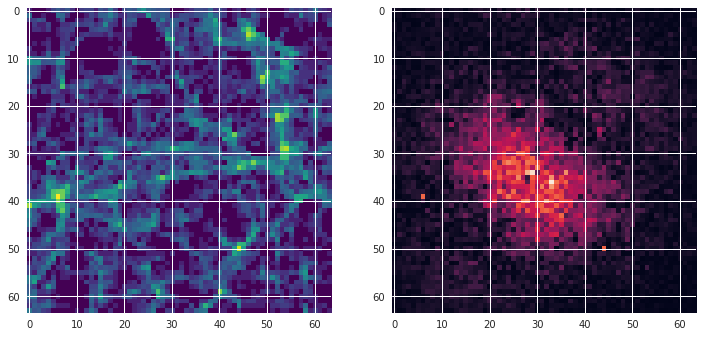

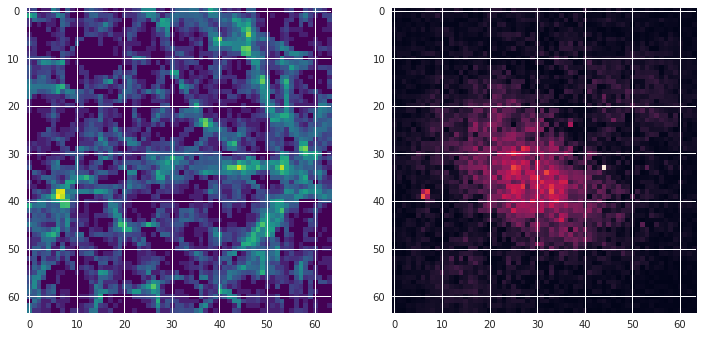

KeyboardInterrupt: 

In [12]:
for boxno, s in enumerate(sal):
    X = np.array(f['Box%03d'%boxno]["X"])[:,:,:,:,0].astype(float)
    X[X==0] = 1+1e-6
    #X = np.log10(X)
    for batch, x in izip(s, X):
        for idx in xrange(64):
            fig = plt.figure(figsize = (12, 6))
            plt.subplot(121)
            plt.imshow(x[idx, :,  :], cmap = 'viridis', norm = LogNorm())
            plt.subplot(122)
            plt.imshow(batch[idx, :, :])#, norm = LogNorm())
            #plt.imshow(batch[idx, :, :], cmap = cm.plasma, alpha = 0.4)
            plt.show()
        break


In [ ]:
for boxno, s in enumerate(sal):
    X = np.array(f['Box%03d'%boxno]["X"])[:,:,:,:,0].astype(float)
    X[X==0] = 1+1e-6
    #X = np.log10(X)
    idx = 10#42
    for batch, x in izip(s, X):
        fig = plt.figure(figsize = (6, 6))
        #plt.subplot(121)
        print batch.max(), batch.min()
        rows, cols = np.where(batch[:,idx, :] < 1e-8)
        imx = x[:, idx, :]
        imx[rows, cols] = 0
        plt.imshow(imx, cmap = 'viridis', norm = LogNorm())

        plt.show()
        break
